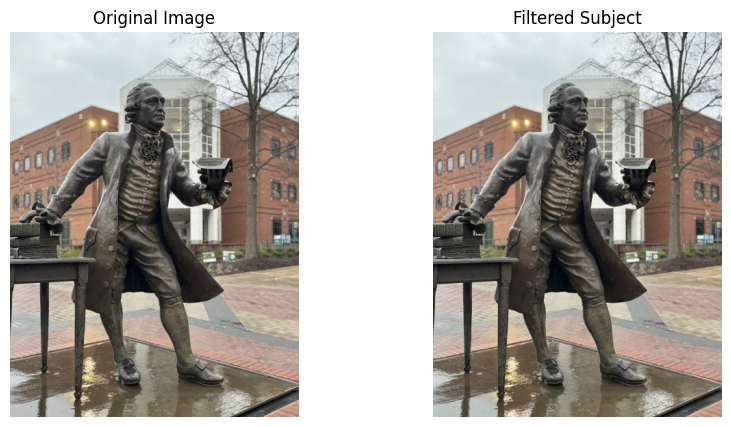

In [3]:
import cv2
import matplotlib.pyplot as plt

def filter_subject(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask for the largest contour
    mask = cv2.drawContours(gray, [largest_contour], 0, (255,255,255), cv2.FILLED)

    # Apply the mask to the original image
    filtered_image = cv2.bitwise_and(image, image, mask=mask)

    return filtered_image

# Path to the image file
image_path = 'images/mason_statue.webp'

# Filter the subject from the image
filtered_image = filter_subject(image_path)

# Display the original and filtered images using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Filtered Subject')
axs[1].axis('off')

plt.show()

